In [1]:
%load_ext autoreload
%autoreload 2

folder = '/home/olga/data_sm/kmer-hashing/classify_coding_vs_noncoding/'

In [2]:
cd $folder

/mnt/data_sm/olga/kmer-hashing/classify_coding_vs_noncoding


In [3]:
ls

Homo_sapiens.GRCh38.cds.all.fa.gz
Homo_sapiens.GRCh38.ncrna.fa.gz
Homo_sapiens.GRCh38.pep.all.fa.gz
Homo_sapiens.GRCh38.pep.subset.fa
Homo_sapiens.GRCh38.pep.subset.fa.gz
human_cds_k15.nodegraph
human_cds_k15.nodegraph.info
human_cds_k17.nodegraph
human_cds_k17.nodegraph.info
human_cds_k19.nodegraph
human_cds_k19.nodegraph.info
human_cds_k21.nodegraph
human_cds_k21.nodegraph.info
human_cds_k23.nodegraph
human_cds_k23.nodegraph.info
human_cds_k25.nodegraph
human_cds_k25.nodegraph.info
human_cds_k27.nodegraph
human_cds_k27.nodegraph.info
human_cds_k31.nodegraph
human_cds_k31.nodegraph.info
human_ncrna_k15.nodegraph
human_ncrna_k15.nodegraph.info
human_ncrna_k15.nodegraph.tagset
human_ncrna_k17.nodegraph
human_ncrna_k17.nodegraph.info
human_ncrna_k19.nodegraph
human_ncrna_k19.nodegraph.info
human_ncrna_k21.nodegraph
human_ncrna_k21.nodegraph.info
human_ncrna_k23.nodegraph
human_ncrna_k23.nodegraph.info
human_ncrna_k25.nodegraph
human_ncrna_k25.nodegraph.info
human_ncrna_k27.nodegraph
huma

In [4]:
ls -lha

total 239G
drwxrwxr-x 2 olga olga 4.0K Oct 13 16:57 ./
drwxrwxr-x 5 olga olga 4.0K Sep 14 08:39 ../
-rw-rw-r-- 1 olga olga  21M Sep 14 06:46 Homo_sapiens.GRCh38.cds.all.fa.gz
-rw-rw-r-- 1 olga olga  16M Sep 14 06:46 Homo_sapiens.GRCh38.ncrna.fa.gz
-rw-rw-r-- 1 olga olga  14M Sep 14 06:46 Homo_sapiens.GRCh38.pep.all.fa.gz
-rw-rw-r-- 1 olga olga 2.6M Oct 13 17:26 Homo_sapiens.GRCh38.pep.subset.fa
-rw-rw-r-- 1 olga olga 489K Oct 13 17:26 Homo_sapiens.GRCh38.pep.subset.fa.gz
-rw-rw-r-- 1 olga olga  15G Sep 14 07:11 human_cds_k15.nodegraph
-rw-rw-r-- 1 olga olga   65 Sep 14 07:11 human_cds_k15.nodegraph.info
-rw-rw-r-- 1 olga olga  15G Sep 14 07:22 human_cds_k17.nodegraph
-rw-rw-r-- 1 olga olga   65 Sep 14 07:22 human_cds_k17.nodegraph.info
-rw-rw-r-- 1 olga olga  15G Sep 14 07:30 human_cds_k19.nodegraph
-rw-rw-r-- 1 olga olga   65 Sep 14 07:30 human_cds_k19.nodegraph.info
-rw-rw-r-- 1 olga olga  15G Sep 14 07:39 human_cds_k21.nodegraph
-rw-rw-r-- 1 olga olga   65 Sep 14 07:39 human_cds_k21

In [5]:
cat human_ncrna_k17.nodegraph.info

30178100 unique k-mers
false positive rate estimated to be 0.000


In [6]:
import gzip
from io import StringIO
from pprint import pprint

from khmer import Nodegraph
import matplotlib.pyplot as plt
import screed
from sourmash._minhash import hash_murmur
from khmer.khmer_args import calculate_graphsize
import pandas as pd
from sourmash.logging import notify
import seaborn as sns
from sklearn import metrics
from tqdm import tqdm
from Bio.Seq import Seq
from Bio import SeqIO

# make all warnings error to get a stack trace
import warnings
warnings.filterwarnings("default")

pd.options.display.max_colwidth = 100

from khtools.compare_kmer_content import kmerize, hpize, dayhoffize


In [18]:
from khtools.partition_reads import score_reads, six_frame_translation_no_stops, compute_low_complexity
from khtools.bloom_filter import make_peptide_bloom_filter

In [19]:
%%time
peptide_ksize = 7

peptide_graph = make_peptide_bloom_filter("Homo_sapiens.GRCh38.pep.all.fa.gz", peptide_ksize)

/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/screed/openscreed.py:39: ResourceWarning: unclosed file <_io.BufferedReader name='Homo_sapiens.GRCh38.pep.all.fa.gz'>
  self.iter_fn = self.open_reader(filename, *args, **kwargs)


CPU times: user 37.9 s, sys: 2.71 s, total: 40.7 s
Wall time: 40.7 s


In [20]:
peptide_graph.n_unique_kmers()

10841698

In [21]:
list(peptide_graph.tags())

[]

In [22]:
peptide_graph.add_tag?

Docstring:
Hashgraph.add_tag(self, kmer)
Add a k-mer to the tagset.
Type:      builtin_function_or_method


In [23]:
dir(peptide_graph)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_kmer_type_error',
 '_validate_partitionmap',
 'abundance_distribution',
 'add',
 'add_stop_tag',
 'add_tag',
 'assign_partition_id',
 'calc_connected_graph_size',
 'consume',
 'consume_and_tag',
 'consume_partitioned_fasta',
 'consume_seqfile',
 'consume_seqfile_and_tag',
 'consume_seqfile_banding',
 'consume_seqfile_banding_with_mask',
 'consume_seqfile_with_mask',
 'count',
 'count_kmers_within_radius',
 'count_partitions',
 'divide_tags_into_subsets',
 'do_subset_partition',
 'extract_unique_paths',
 'find_all_tags',
 'find_all_tags_list',
 'find_high_degree_nodes',
 'find_spectral_error_positions',
 'get',
 'get_kmer_counts

In [24]:
%%time

warnings.filterwarnings("error")

reads = 'SRR306838_GSM752691_hsa_br_F_1_trimmed.fq.gz'

coding_scores = score_reads(reads, peptide_graph, peptide_ksize)

Exception ignored in: <_io.FileIO name='SRR306838_GSM752691_hsa_br_F_1_trimmed.fq.gz' mode='rb' closefd=True>
795517it [07:23, 1794.13it/s]


CPU times: user 7min 16s, sys: 10.9 s, total: 7min 26s
Wall time: 7min 23s


In [25]:
coding_scores.head()

,read_id,jaccard_in_peptide_db,n_kmers,classification
0,SRR306838.1531 Ibis_Run100924_C3PO:6:1:15718:1062/1,-1.0,2,low complexity
1,SRR306838.1617 Ibis_Run100924_C3PO:6:1:9036:1074/1,0.0,0,non-coding
2,SRR306838.1672 Ibis_Run100924_C3PO:6:1:15751:1077/1,-1.0,1,low complexity
3,SRR306838.1938 Ibis_Run100924_C3PO:6:1:15775:1103/1,-1.0,1,low complexity
4,SRR306838.2318 Ibis_Run100924_C3PO:6:1:15779:1141/1,-1.0,7,non-coding


In [26]:
coding_scores.shape

(795517, 4)

In [27]:
coding_scores_not_low_complexity = coding_scores.query('jaccard_in_peptide_db >= 0')
print(coding_scores_not_low_complexity.shape)
coding_scores_not_low_complexity.head()

(793969, 4)


,read_id,jaccard_in_peptide_db,n_kmers,classification
1,SRR306838.1617 Ibis_Run100924_C3PO:6:1:9036:1074/1,0.000000,0,non-coding
7,SRR306838.2723 Ibis_Run100924_C3PO:6:1:15754:1168/1,0.769231,13,non-coding
9,SRR306838.3707 Ibis_Run100924_C3PO:6:1:5241:1269/1,1.000000,16,coding
10,SRR306838.4251 Ibis_Run100924_C3PO:6:1:5141:1314/1,0.000000,15,non-coding
11,SRR306838.4936 Ibis_Run100924_C3PO:6:1:5473:1375/1,0.000000,14,non-coding


In [28]:
folder = '/home/olga/data_sm/kmer-hashing/brawand2011/human/'
! ls -lha $folder

coding_read_ids = pd.read_csv(f"{folder}/SRR306838_GSM752691_hsa_br_F_1Aligned.sortedByCoord.out.bam.unspliced.out_CDS_without_stop_codon_or_utr.read_ids.txt", 
                                   header=None, squeeze=True)

# Try just CDS minus stop codons .... but classification goes down from 92% to 90%
# coding_read_ids = pd.read_csv(f"{folder}/SRR306838_GSM752691_hsa_br_F_1Aligned.sortedByCoord.out.bam.unspliced.CDS_without_stop_codon.read_ids.txt", 
#                                    header=None, squeeze=True)
print(coding_read_ids.shape)
coding_read_ids.head()

total 362M
drwxrwxr-x 2 olga olga 4.0K Oct 11 21:11 .
drwxrwxr-x 3 olga olga 4.0K Sep 10 15:07 ..
-rw-rw-r-- 1 olga olga  52M Oct 11 18:07 SRR306838_GSM752691_hsa_br_F_1Aligned.sortedByCoord.out.bam.unspliced.bam
-rw-rw-r-- 1 olga olga 2.9M Oct 11 18:08 SRR306838_GSM752691_hsa_br_F_1Aligned.sortedByCoord.out.bam.unspliced.bam.bai
-rw-rw-r-- 1 olga olga 1.9M Oct 11 21:11 SRR306838_GSM752691_hsa_br_F_1Aligned.sortedByCoord.out.bam.unspliced.CDS_without_stop_codon.read_ids.txt
-rw-rw-r-- 1 olga olga 7.0M Oct 11 20:58 SRR306838_GSM752691_hsa_br_F_1Aligned.sortedByCoord.out.bam.unspliced.out_CDS_without_stop_codon.bam
-rw-rw-r-- 1 olga olga 6.1M Oct 11 18:08 SRR306838_GSM752691_hsa_br_F_1Aligned.sortedByCoord.out.bam.unspliced.out_CDS_without_stop_codon_or_utr.bam
-rw-rw-r-- 1 olga olga 1.8M Oct 11 18:08 SRR306838_GSM752691_hsa_br_F_1Aligned.sortedByCoord.out.bam.unspliced.out_CDS_without_stop_codon_or_utr.bam.bai
-rw-rw-r-- 1 olga olga 1.7M Oct 11 18:08 SRR306838_GSM752691_hsa_br_F_1Aligne

0    SRR306838.13598607
1    SRR306838.23303318
2    SRR306838.19917713
3    SRR306838.19937719
4    SRR306838.20862490
Name: 0, dtype: object

In [29]:
true_coding_read_ids = set(coding_read_ids.values)
len(true_coding_read_ids)

90307

In [30]:
unspliced_read_ids_series = pd.read_csv(f"{folder}/SRR306838_GSM752691_hsa_br_F_1Aligned.sortedByCoord.out.bam.unspliced.read_ids.txt", 
                                   header=None, squeeze=True)
print(unspliced_read_ids_series.shape)
unspliced_read_ids_series.head()

unspliced_reads = set(unspliced_read_ids_series.values)

(807698,)


In [37]:
# coding_scores_not_low_complexity['read_id'].str.split().str[0]

In [38]:
coding_scores_not_low_complexity.loc['short_read_id', :] = coding_scores_not_low_complexity['read_id'].str.split().str[0]
print(coding_scores_not_low_complexity.shape)
coding_scores_not_low_complexity.head()

SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

In [39]:
coding_scores_not_low_complexity_unspliced = coding_scores_not_low_complexity.query('short_read_id in @unspliced_reads')
coding_scores_not_low_complexity_unspliced['in_cds_no_stop_codon'] = coding_scores_not_low_complexity_unspliced.short_read_id.isin(true_coding_read_ids)
print(coding_scores_not_low_complexity_unspliced.shape)
coding_scores_not_low_complexity_unspliced.head()

SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

AUC: 0.9332425339782375
accuracy score: 0.9019756727303703
              precision    recall  f1-score   support

       False       0.99      0.90      0.94    590637
        True       0.58      0.94      0.72     90245

   micro avg       0.90      0.90      0.90    680882
   macro avg       0.79      0.92      0.83    680882
weighted avg       0.94      0.90      0.91    680882



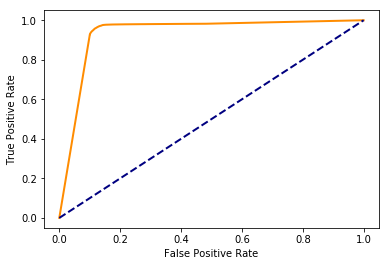

In [42]:
y_true = coding_scores_not_low_complexity_unspliced['in_cds_no_stop_codon']
y_score = coding_scores_not_low_complexity_unspliced['jaccard_in_peptide_db']
y_pred = y_score > 0.9

fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
auc = metrics.auc(fpr, tpr)
print(f"AUC: {auc}")

fig, ax = plt.subplots()
lw = 2
ax.plot(fpr, tpr, lw=2, color='darkorange')
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

print("accuracy score:", metrics.accuracy_score(y_true, y_pred))

print(metrics.classification_report(y_true, y_pred))

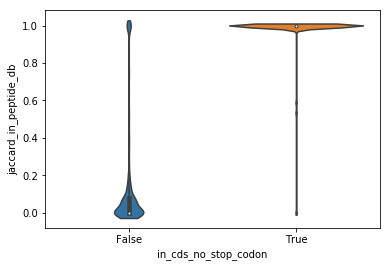

In [87]:


sns.violinplot(x='in_cds_no_stop_codon', y='jaccard_in_peptide_db', data=coding_scores_not_low_complexity_unspliced, 
               bw=0.1, cut=True)

## Where do they disagree?

### False negative - Low jaccard but the read is in the coding dataset
Truly a coding read but low "coding score"

In [90]:
coding_scores_not_low_complexity_unspliced.query("jaccard_in_peptide_db < 0.9 & in_cds_no_stop_codon == True").shape

(3, 6)

In [89]:
coding_scores_not_low_complexity_unspliced.query("jaccard_in_peptide_db < 0.9 & in_cds_no_stop_codon == True").head()

,read_id,jaccard_in_peptide_db,n_kmers,classification,short_read_id,in_cds_no_stop_codon
289,SRR306838.8536423 Ibis_Run100924_C3PO:6:41:4477:5833/1,0.588235,17,non-coding,SRR306838.8536423,True
740,SRR306838.4158712 Ibis_Run100924_C3PO:6:19:4365:17337/1,0.533333,15,non-coding,SRR306838.4158712,True
991,SRR306838.20339512 Ibis_Run100924_C3PO:6:102:15178:5329/1,0.000000,16,non-coding,SRR306838.20339512,True


In [91]:
df = coding_scores_not_low_complexity_unspliced.query("jaccard_in_peptide_db < 0.9 & in_cds_no_stop_codon == True")
for read_id in df.short_read_id:
    ! samtools view $folder/$unspliced_bam | grep $read_id

SRR306838.8536423	0	chr1	39448668	255	70M	*	0	0	AAAGACTTTGCTTCCCGAAGATACTCAGAAACTTGACAATTTCCTAGGAGAAGTCAGAGACAAATGGGAT	-0454575:38569357656746757387639475375567787758567758596:6957665665585	NH:i:1	HI:i:1	AS:i:66	nM:i:1	RG:Z:SRR306838_GSM752691_hsa_br_F_1
SRR306838.4158712	16	chrX	129814671	255	49M14S	*	0	0	GACGATGTTGAAGGCGAAGACATAGATTGTGAGGAGGGAGAAAGAAAGGGAAGTAGAAGTAGG	836857646958738766836846574664767626764766584546386474576222000	NH:i:1	HI:i:1	AS:i:46	nM:i:1	RG:Z:SRR306838_GSM752691_hsa_br_F_1
SRR306838.20339512	0	chr2	26192330	255	54M16S	*	0	0	CTTCGGACTCGCTAAAATACTATCCATGTCAGAATTCAAATCCTTCCTCTTCACTTATCATCTTCACAAT	31/3331654544412543575556554166666648555667768766468567466675:68555765	NH:i:1	HI:i:1	AS:i:51	nM:i:1	RG:Z:SRR306838_GSM752691_hsa_br_F_1


Read maps to "MACF1"

In [76]:


score_single_sequence("AAAGACTTTGCTTCCCGAAGATACTCAGAAACTTGACAATTTCCTAGGAGAAGTCAGAGACAAATGGGAT", peptide_graph, peptide_ksize)

	translation: 	KTLLPEDTQKLDNFLGEVRDKWD
	kmers: FLGEVRD DTQKLDN LPEDTQK KLDNFLG LLPEDTQ EVRDKWD GEVRDKW PEDTQKL TQKLDNF LDNFLGE EDTQKLD NFLGEVR LGEVRDK KTLLPED TLLPEDT DNFLGEV QKLDNFL
	K-mers in peptide database:
{('DNFLGEV', 7517166875925614125): 1,
 ('DTQKLDN', 5951274799996309732): 0,
 ('EDTQKLD', 14887061883264050655): 0,
 ('EVRDKWD', 829818351693786468): 1,
 ('FLGEVRD', 9516214906786795876): 1,
 ('GEVRDKW', 8385754174638241851): 1,
 ('KLDNFLG', 3011079111732742999): 1,
 ('KTLLPED', 14836733754548320237): 1,
 ('LDNFLGE', 14534966961722312621): 1,
 ('LGEVRDK', 79391250229811418): 1,
 ('LLPEDTQ', 14973099275059575838): 0,
 ('LPEDTQK', 7311319343166724544): 0,
 ('NFLGEVR', 966627286140107258): 1,
 ('PEDTQKL', 908198253004630471): 0,
 ('QKLDNFL', 4722373045142000694): 1,
 ('TLLPEDT', 7583591577639096127): 0,
 ('TQKLDNF', 1242088564466415818): 0}


(0.5882352941176471, 17)

In [64]:
unspliced_bam = 'SRR306838_GSM752691_hsa_br_F_1Aligned.sortedByCoord.out.bam.unspliced.bam'

# This reads aligns to the CBLN2 
noncoding_read_id = 'SRR306838.8536423'
! samtools view $folder/$unspliced_bam | grep $noncoding_read_id

SRR306838.8536423	0	chr1	39448668	255	70M	*	0	0	AAAGACTTTGCTTCCCGAAGATACTCAGAAACTTGACAATTTCCTAGGAGAAGTCAGAGACAAATGGGAT	-0454575:38569357656746757387639475375567787758567758596:6957665665585	NH:i:1	HI:i:1	AS:i:66	nM:i:1	RG:Z:SRR306838_GSM752691_hsa_br_F_1


In [44]:
unspliced_bam = 'SRR306838_GSM752691_hsa_br_F_1Aligned.sortedByCoord.out.bam.unspliced.bam'

# This reads aligns to the CBLN2 
noncoding_read_id = 'SRR306838.733972	'
! samtools view $folder/$unspliced_bam | grep $noncoding_read_id

SRR306838.7339725	0	chr3	194639082	255	57M	*	0	0	TTGGGGCAAAACACTGGTCCTCTCTGCACTTGTGTGTTCCTTTCTGTAAAAGGAGGA	-4566323463646545356576866534585655666655868:953234765867	NH:i:1	HI:i:1	AS:i:56	nM:i:0	RG:Z:SRR306838_GSM752691_hsa_br_F_1
SRR306838.733972	16	chr18	72538162	255	49M	*	0	0	AGGGAGCTCTGTGTTTATAGAGGAAACACCAAGAAGCCCGAGAATGTGG	6666776687536257653736764476765533375546588363312	NH:i:1	HI:i:1	AS:i:46	nM:i:1	RG:Z:SRR306838_GSM752691_hsa_br_F_1


In [45]:
unspliced_bam = 'SRR306838_GSM752691_hsa_br_F_1Aligned.sortedByCoord.out.bam.unspliced.bam'

# This reads aligns to the CBLN2 
noncoding_read_id = 'SRR306838.17561853	'
! samtools view $folder/$unspliced_bam | grep $noncoding_read_id

SRR306838.17561853	16	chrM	3811	255	67M	*	0	0	CAAGAACACCTCTGATTACTCCTGCCATCATGACCCTTGGCCATAATATGATTTATCTCCACACTAG	78677564566847334362785755:66:5525674587556457767724344164757626035	NH:i:1	HI:i:1	AS:i:65	nM:i:0	RG:Z:SRR306838_GSM752691_hsa_br_F_1


In [49]:
df = coding_scores_unspliced.query("jaccard_in_peptide_db < 0.5 & in_cds_no_stop_codon == True")
for read_id in df.short_read_id:
    ! samtools view $folder/$unspliced_bam | grep $read_id

SRR306838.17561853	16	chrM	3811	255	67M	*	0	0	CAAGAACACCTCTGATTACTCCTGCCATCATGACCCTTGGCCATAATATGATTTATCTCCACACTAG	78677564566847334362785755:66:5525674587556457767724344164757626035	NH:i:1	HI:i:1	AS:i:65	nM:i:0	RG:Z:SRR306838_GSM752691_hsa_br_F_1
SRR306838.3607263	16	chrM	8401	255	12S60M	*	0	0	GTCATGCAAAAGAATTACCCCCATACTCCTTACACTATTCCTTATCACCCAACTAAAAACATTAAACACAAA	557:977:86<;8744366867844:78935686846668:434655896;58479533962386971613.	NH:i:1	HI:i:1	AS:i:55	nM:i:2	RG:Z:SRR306838_GSM752691_hsa_br_F_1
SRR306838.23727244	16	chrM	14157	255	66M	*	0	0	CCCGAGCAATCTCAATTACAATATATACACCAACAAACAATGTTCAACCAGTAACTACTACTAATC	6678867778855785236875525246355726854665351366456341337226254200.1	NH:i:1	HI:i:1	AS:i:64	nM:i:0	RG:Z:SRR306838_GSM752691_hsa_br_F_1
SRR306838.3497462	16	chrM	8428	255	58M	*	0	0	CCTCATCACCCAACTAAAAACATTAAACACAAACTACCACCTACCTCCCTCACCAAAG	7:78:573468:571665736743343457634611672683/472883267672035	NH:i:1	HI:i:1	AS:i:55	nM:i:1	RG:Z:SRR306838_GSM752691_hsa_br_F_1
SRR306838.12840151	1

A lot of these are chromosome M (mitochondria) so let's ignore all reads mapping to the mitochondria

In [46]:
unspliced_bam = 'SRR306838_GSM752691_hsa_br_F_1Aligned.sortedByCoord.out.bam.unspliced.bam'

# This reads aligns to the CBLN2 
noncoding_read_id = 'SRR306838.3607263'
! samtools view $folder/$unspliced_bam | grep $noncoding_read_id

SRR306838.3607263	16	chrM	8401	255	12S60M	*	0	0	GTCATGCAAAAGAATTACCCCCATACTCCTTACACTATTCCTTATCACCCAACTAAAAACATTAAACACAAA	557:977:86<;8744366867844:78935686846668:434655896;58479533962386971613.	NH:i:1	HI:i:1	AS:i:55	nM:i:2	RG:Z:SRR306838_GSM752691_hsa_br_F_1


In [47]:
unspliced_bam = 'SRR306838_GSM752691_hsa_br_F_1Aligned.sortedByCoord.out.bam.unspliced.bam'

# This reads aligns to the CBLN2 
noncoding_read_id = 'SRR306838.23727244'
! samtools view $folder/$unspliced_bam | grep $noncoding_read_id

SRR306838.23727244	16	chrM	14157	255	66M	*	0	0	CCCGAGCAATCTCAATTACAATATATACACCAACAAACAATGTTCAACCAGTAACTACTACTAATC	6678867778855785236875525246355726854665351366456341337226254200.1	NH:i:1	HI:i:1	AS:i:64	nM:i:0	RG:Z:SRR306838_GSM752691_hsa_br_F_1


In [24]:
from khtools.partition_reads import score_single_sequence
s = "CAAGAACACCTCTGATTACTCCTGCCATCATGACCCTTGGCCATAATATGATTTATCTCCACACTAG"
seq = Seq(s)

score_single_sequence(s, peptide_graph, peptide_ksize, 'protein', verbose=True)

	translation: 	RTPLITPAIMTLGHNMIYLHT
	kmers: NMIYLHT PLITPAI TPLITPA LITPAIM AIMTLGH HNMIYLH GHNMIYL ITPAIMT RTPLITP IMTLGHN MTLGHNM TLGHNMI TPAIMTL PAIMTLG LGHNMIY
	K-mers in peptide database:
{('AIMTLGH', 4934959604245948732): 0,
 ('GHNMIYL', 8679214931415330990): 0,
 ('HNMIYLH', 9860068405428524224): 0,
 ('IMTLGHN', 5007379133261696389): 0,
 ('ITPAIMT', 1845456223218030233): 0,
 ('LGHNMIY', 14440126941365645435): 0,
 ('LITPAIM', 12273716599056031256): 0,
 ('MTLGHNM', 8490348177331113914): 0,
 ('NMIYLHT', 5523607257588686990): 0,
 ('PAIMTLG', 2938204897806652236): 0,
 ('PLITPAI', 1294566589529317893): 0,
 ('RTPLITP', 14525035971622691714): 0,
 ('TLGHNMI', 15987995585519721535): 0,
 ('TPAIMTL', 2070009544365237801): 0,
 ('TPLITPA', 14027991606434210618): 0}
	translation: 	SVEINHIMAKGHDGRSNQRCS
	kmers: RSNQRCS EINHIMA GHDGRSN DGRSNQR GRSNQRC AKGHDGR INHIMAK HDGRSNQ SVEINHI VEINHIM KGHDGRS NHIMAKG IMAKGHD HIMAKGH MAKGHDG
	K-mers in peptide database:
{('AKGHDGR', 11854149275921946754): 0

(0, 15)

In [ ]:
hash_murmur("QSSSPEF")

In [ ]:
peptide_graph.get(9478686570769398934)

In [92]:
for record in tqdm(screed.open('Homo_sapiens.GRCh38.pep.all.fa.gz')):
    if 'QSSSPEFRVQSFSERTNARKKNNH' in record['sequence']:
        print("---- QSSSPEFRVQSFSERTNARKKNNH ----")
        print(record)
    if "TOPORS" in record['name']:
        print("---- TOPORS ----")
        print(record)

/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/screed/openscreed.py:39: ResourceWarning: unclosed file <_io.BufferedReader name='Homo_sapiens.GRCh38.pep.all.fa.gz'>
  self.iter_fn = self.open_reader(filename, *args, **kwargs)
46151it [00:01, 36395.48it/s]

---- QSSSPEFRVQSFSERTNARKKNNH ----
{'name': 'ENSP00000353735.2 pep chromosome:GRCh38:9:32540544:32552586:-1 gene:ENSG00000197579.8 transcript:ENST00000360538.7 gene_biotype:protein_coding transcript_biotype:protein_coding gene_symbol:TOPORS description:TOP1 binding arginine/serine rich protein [Source:HGNC Symbol;Acc:HGNC:21653]', 'sequence': 'MGSQPPLGSPLSREEGEAPPPAPASEGRRRSRRVRLRGSCRHRPSFLGCRELAASAPARPAPASSEIMASAAKEFKMDNFSPKAGTSKLQQTVPADASPDSKCPICLDRFDNVSYLDRCLHKFCFRCVQEWSKNKAECPLCKQPFDSIFHSVRAEDDFKEYVLRPSYNGSFVTPDRRFRYRTTLTRERNASVYSPSGPVNRRTTTPPDSGVLFEGLGISTRPRDVEIPQFMRQIAVRRPTTADERSLRKIQEQDIINFRRTLYRAGARVRNIEDGGRYRDISAEFFRRNPACLHRLVPWLKRELTVLFGAHGSLVNIVQHIIMSNVTRYDLESQAFVSDLRPFLLNRTEHFIHEFISFARSPFNMAAFDQHANYDCPAPSYEEGSHSDSSVITISPDEAETQELDINVATVSQAPWDDETPGPSYSSSEQVHVTMSSLLNTSDSSDEELVTGGATSQIQGVQTNDDLNNDSDDSSDNCVIVGFVKPLAERTPELVELSSDSEDLGSYEKMETVKTQEQEQSYSSGDSDVSRCSSPHSVLGKDEQINKGHCDSSTRIKSKKEEKRSTSLSSPRNLNSSVRGDRVYSPYNHRHRKRGRSRSSDSRSQSRSGHDQKNHRKHHGKKRMKSKRSRSRESSRPRGRRDKKRSRTRDSSWS

110048it [00:03, 36127.01it/s]


In [51]:
is_low_complexity(s, 21)

(False, 51)

In [47]:
six_frame_translation_no_stops(seq)

[Seq('LECEITYFMCLLTKNTNDKGKSH', ExtendedIUPACProtein()),
 Seq('WLFPLSLVFLVRRHMKYVISHSR', ExtendedIUPACProtein())]

## False positive - high jaccard but in noncoding set

In [69]:
false_positives = coding_scores_not_low_complexity_unspliced.query("jaccard_in_peptide_db > 0.9 & in_cds_no_stop_codon == False")
print(false_positives.shape)
false_positives.head()

(67, 6)


,read_id,jaccard_in_peptide_db,n_kmers,classification,short_read_id,in_cds_no_stop_codon
20,SRR306838.7944356 Ibis_Run100924_C3PO:6:38:5591:5659/1,1.0,7,coding,SRR306838.7944356,False
64,SRR306838.6939297 Ibis_Run100924_C3PO:6:33:5394:5316/1,1.0,15,coding,SRR306838.6939297,False
66,SRR306838.23317726 Ibis_Run100924_C3PO:6:115:10861:16547/1,1.0,17,coding,SRR306838.23317726,False
82,SRR306838.18085420 Ibis_Run100924_C3PO:6:91:3302:10193/1,1.0,16,coding,SRR306838.18085420,False
106,SRR306838.16938253 Ibis_Run100924_C3PO:6:85:7026:15703/1,1.0,17,coding,SRR306838.16938253,False


In [70]:

noncoding_read_id = 'SRR306838.7944356	'
! samtools view $folder/$unspliced_bam | grep $noncoding_read_id

SRR306838.7944356	16	chr19	6501568	255	42M	*	0	0	CCATGGTATGTGCCTGTGGGGTCGATGCCATGTTCGTCACTG	569626336635575648568542566376495452670712	NH:i:1	HI:i:1	AS:i:41	nM:i:0	RG:Z:SRR306838_GSM752691_hsa_br_F_1


In [73]:

noncoding_read_id = 'SRR306838.6939297	'
! samtools view $folder/$unspliced_bam | grep $noncoding_read_id

SRR306838.6939297	16	chr11	63758272	255	65M	*	0	0	ATGAAGGAAAATACTCAGTGTCAGCTTGAGCCTGCATTCCAAGCTTTTTTTTTAATTTGGTGTTT	57:6669965;82667:64748:4:588668966785767898958667558635755376530.	NH:i:1	HI:i:1	AS:i:63	nM:i:0	RG:Z:SRR306838_GSM752691_hsa_br_F_1
